In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn

In [38]:
df = pd.read_csv('drive/MyDrive/auction data/auction_stats_corrected_final.csv') #replace with path to data

In [39]:
df.head()

,player_pkey,Player,Team,Year,isOverseas,isBatsman,isBowler,isWicketKeeper,isCapped,UncappedAndPerformed,...,average_bat,wickets_per_match,matches_bowl,economy_rate,strike_rate_bowl,average_bowl,bat_powerplay,bat_death,bowl_powerplay,bowl_death
0,219,Aaron Finch,Royal Challengers Bangalore,2020,1,1,0,0,1,0,...,41.169811,0.000000,1,5.000000,0.000000,0.0,675.712344,185.166444,0.0,0.0
1,217,Abdul Samad,Sunrisers Hyderabad,2020,0,1,1,0,0,0,...,27.333333,0.000000,4,7.600000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,1944,Abhijeet Tomar,Kolkata Knight Riders,2022,0,1,0,0,0,0,...,13.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0,Abhinav Sadarangani,Gujarat Titans,2022,0,1,0,0,0,0,...,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,76,Abhishek Sharma,Sunrisers Hyderabad,2022,0,1,1,0,0,1,...,25.590909,0.636364,11,7.904762,23.714286,18.0,29.225000,111.251652,0.0,33.0


In [25]:
X = df.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y = df['Amount']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
len(X_test)

65

In [41]:
result = pd.DataFrame()

models = [LinearRegression(), BayesianRidge(), SVR(C=1.0, epsilon=0.2),
          XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
         RandomForestRegressor()]

for model in models:
    model.fit(X_train, y_train)
    a = model.score(X_train, y_train)
    b = model.score(X_test, y_test)
    result = result.append({'name': str(model), 'Train': a, 'Test': b}, ignore_index=True)

<ipython-input-41-717a9fad4d0c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'name': str(model), 'Train': a, 'Test': b}, ignore_index=True)
<ipython-input-41-717a9fad4d0c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'name': str(model), 'Train': a, 'Test': b}, ignore_index=True)
<ipython-input-41-717a9fad4d0c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'name': str(model), 'Train': a, 'Test': b}, ignore_index=True)
<ipython-input-41-717a9fad4d0c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'name': str(model), 'Train': a,

In [42]:
result

,name,Train,Test
0,LinearRegression(),0.524424,0.442240
1,BayesianRidge(),0.513372,0.425811
2,SVR(epsilon=0.2),0.102065,-0.181128
3,"XGBRegressor(base_score=None, booster=None, ca...",0.965820,0.484576
4,RandomForestRegressor(),0.892862,0.522651


In [ ]:
import joblib
model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)
joblib.dump(model,'drive/MyDrive/auction data/RandomForest_baseline.sav')

The best model was RandomForestRegressor(). The saved model can be found in the folder 'trained models'


In [53]:
import joblib
model=joblib.load('drive/MyDrive/auction data/RandomForest_baseline.sav') #replace with path to saved model

In [54]:
y_pred=model.predict(X_test)
sklearn.metrics.mean_absolute_error(y_test,y_pred)

1.7398021624986741

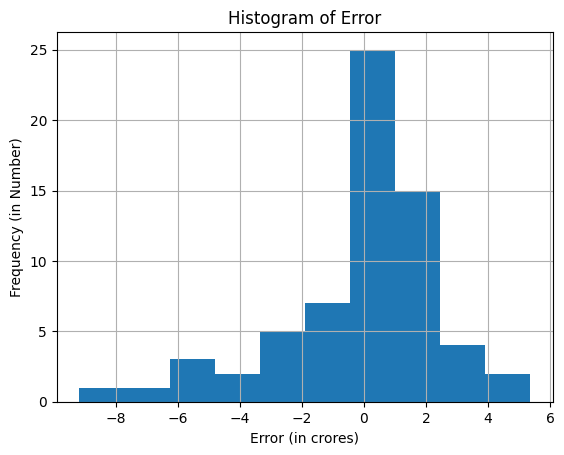

In [55]:
plt.hist(y_pred-y_test)
plt.title('Histogram of Error')
plt.xlabel('Error (in crores)')
plt.ylabel('Frequency (in Number)')
plt.grid('on')

The rest of the code was used to see if using different models for each category ( batsman vs bowler vs allrounder vs wicketkeeper etc.) produced better results. It didnt produce better results and can be ignored

In [ ]:
df = pd.read_csv('auction_stats.csv')
df=df[(df['isBatsman']==1) & (df['isBowler']!=1)&(df['isWicketKeeper']!=1)]
X = df.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y = df['Amount']
X_train, X_test, y_train, y_test_bat = train_test_split(X, y, test_size=0.2, random_state=42)
#model1=CatBoostRegressor()
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred_bat=model1.predict(X_test)
model1.score(X_test,y_test_bat)

0.4457090018604266

In [ ]:
df = pd.read_csv('auction_stats.csv')
df=df[(df['isBatsman']==0) & (df['isBowler']==1)&(df['isWicketKeeper']!=1)]
X = df.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y = df['Amount']
X_train, X_test, y_train, y_test_bowl = train_test_split(X, y, test_size=0.2, random_state=42)
model2=sklearn.linear_model.Ridge(alpha=0.1)
#model2=RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred_bowl=model2.predict(X_test)
model2.score(X_test,y_test_bowl)

0.5313027207765155

In [ ]:
df = pd.read_csv('auction_stats.csv')
df=df[(df['isBatsman']==1) & (df['isBowler']==1)&(df['isWicketKeeper']!=1)]
X = df.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y = df['Amount']
X_train, X_test, y_train, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)
model3=sklearn.linear_model.Ridge(alpha=0.1)
#model3=RandomForestRegressor()
model3.fit(X_train,y_train)
y_pred_all=model3.predict(X_test)
model3.score(X_test,y_test_all)

0.4567281107089901

In [ ]:
df = pd.read_csv('auction_stats.csv')
df=df[df['isWicketKeeper']==1]
X = df.drop(columns=['player_pkey', 'Player', 'Team', 'Year', 'Amount'])
y = df['Amount']
X_train, X_test, y_train, y_test_wk = train_test_split(X, y, test_size=0.2, random_state=42)
model4=sklearn.linear_model.Ridge(alpha=0.0000001)
#model4=RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred_wk=model4.predict(X_test)
model4.score(X_test,y_test_wk)

0.2867663376193408

In [ ]:
y_pred=np.append(np.append(np.append(y_pred_bat,y_pred_bowl),y_pred_all),y_pred_wk)
y_test=np.append(np.append(np.append(y_test_bat,y_test_bowl),y_test_all),y_test_wk)
print(sklearn.metrics.r2_score(y_test,y_pred))
sklearn.metrics.mean_absolute_error(y_test,y_pred)

0.489010828474178


1.9885746984625148